문제 정의: 지하철을 운영 시간대별로 혼잡도를 분석하여, 혼잡한 시간대에 대중교통 수단을 제공하거나 운행 빈도를 조절함으로써 서비스 품질을 향상시킬 수 있습니다.
구체적으로 어떤 시간대에 지하철이 가장 혼잡한지 확인할 수 있어, 지하철 운영 기관은 운행 일정을 최적화하고 승객들에게 편리한 서비스를 제공할 수 있고 혼잡한 시간대에 대중교통을 이용하는 승객들은 더욱 원활하고 편리한 이용 환경을 기대할 수 있습니다.

선택한 데이터: 선택한 데이터는 공공데이터포탈의 "서울교통공사_지하철혼잡도정보_20230331.csv"입니다. 이 데이터셋은 서울교통공사가 제공하는 지하철 혼잡도 정보를 담고 있습니다. 데이터에는 각 호선별로 시간대별 혼잡도가 기록되어 있습니다.

In [99]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [100]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [110]:
# 데이터 불러오기
df = pd.read_csv('c:/clu/서울교통공사_지하철혼잡도정보_20230331.csv', encoding='euc-kr')
df.head()

,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분
0,1,평일,1,150,서울역,상선,8.2,18.9,19.8,35.7,...,19.4,18.6,18.4,15.0,17.4,18.9,15.2,13.1,7.3,1.1
1,2,평일,1,150,서울역,하선,11.1,10.7,15.7,23.5,...,39.6,37.0,42.5,36.5,41.0,29.1,18.4,16.2,5.5,0.0
2,3,평일,1,151,시청,상선,8.0,13.3,16.9,29.2,...,23.3,22.5,23.1,18.5,21.6,21.6,19.5,14.4,7.7,1.6
3,4,평일,1,151,시청,하선,9.1,9.9,17.7,22.7,...,34.1,33.6,39.1,30.2,35.1,24.5,15.8,14.1,4.1,0.4
4,5,평일,1,152,종각,상선,7.8,11.7,10.6,19.5,...,31.8,29.5,32.5,24.8,28.2,28.4,26.7,17.0,8.6,1.5


In [124]:
# 호선이 1이고 출발역이 서울역인 데이터 필터링
filtered_data = df[(df['호선'] == 1) & (df['출발역'] == '서울역')]

# 8시30분과 17시30분 열의 평균 계산
mean_8_30 = filtered_data['8시30분'].mean()
mean_17_30 = filtered_data['17시30분'].mean()

print("8시30분 열의 평균:", mean_8_30)
print("17시30분 열의 평균:", mean_17_30)


8시30분 열의 평균: 31.033333333333335
17시30분 열의 평균: 44.23333333333333


In [128]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("c:/clu/서울교통공사_지하철혼잡도정보_20230331.csv", encoding='cp949')

# 출발역 열 제거
df.drop(columns=['출발역'], inplace=True)

# 상하구분 열 제거
df.drop(columns=['상하구분'], inplace=True)

# 상하구분 열 제거
df.drop(columns=['요일구분'], inplace=True)

# 호선 열이 1인 데이터만 필터링
filtered_data = df[df['호선'] == 1]

# 시간별 열들의 평균 계산
average_congestion_by_time = filtered_data.iloc[:, 4:].mean()

# 결과 출력
print(average_congestion_by_time)


6시00분     11.890000
6시30분     10.751667
7시00분     15.225000
7시30분     21.481667
8시00분     26.103333
8시30분     27.208333
9시00분     26.791667
9시30분     28.918333
10시00분    28.298333
10시30분    27.228333
11시00분    27.181667
11시30분    26.886667
12시00분    30.578333
12시30분    32.675000
13시00분    31.915000
13시30분    32.835000
14시00분    35.701667
14시30분    34.138333
15시00분    35.300000
15시30분    36.711667
16시00분    33.468333
16시30분    35.970000
17시00분    35.330000
17시30분    38.536667
18시00분    43.315000
18시30분    34.140000
19시00분    28.621667
19시30분    24.293333
20시00분    23.708333
20시30분    21.751667
21시00분    23.570000
21시30분    20.405000
22시00분    20.606667
22시30분    17.948333
23시00분    17.988333
23시30분    13.486667
00시00분     6.855000
00시30분     0.256667
dtype: float64


C:\Users\junsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\junsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


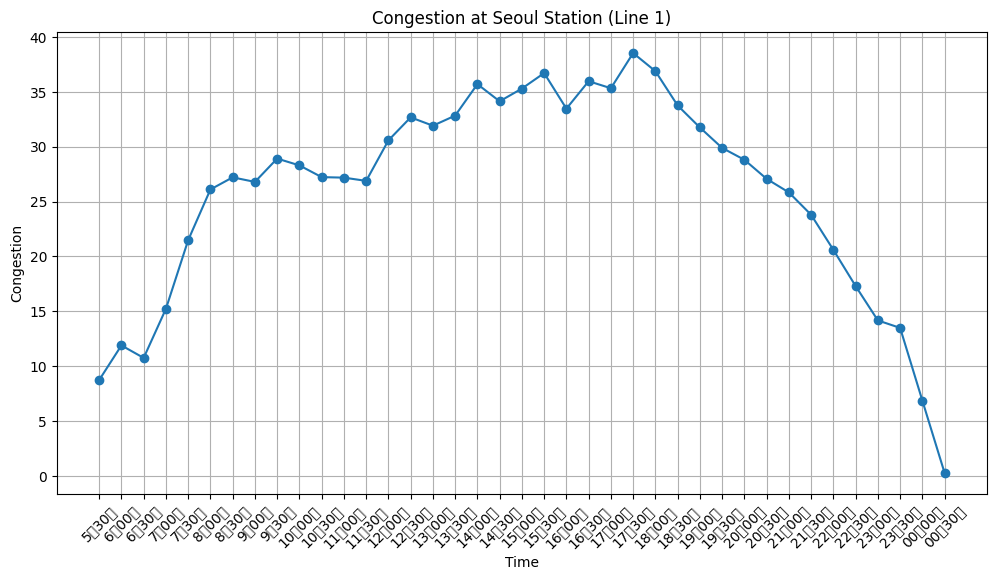

In [141]:
import matplotlib.pyplot as plt

# 시간별 혼잡도 데이터 정의
congestion_data = {
    "5시30분": 8.735, "6시00분": 11.89, "6시30분": 10.751667, "7시00분": 15.225, "7시30분": 21.481667,
    "8시00분": 26.103333, "8시30분": 27.208333, "9시00분": 26.791667, "9시30분": 28.918333, "10시00분": 28.298333,
    "10시30분": 27.228333, "11시00분": 27.181667, "11시30분": 26.886667, "12시00분": 30.578333, "12시30분": 32.675,
    "13시00분": 31.915, "13시30분": 32.835, "14시00분": 35.701667, "14시30분": 34.138333, "15시00분": 35.3,
    "15시30분": 36.711667, "16시00분": 33.468333, "16시30분": 35.97, "17시00분": 35.33, "17시30분": 38.536667,
    "18시00분": 36.885, "18시30분": 33.758333, "19시00분": 31.751667, "19시30분": 29.888333, "20시00분": 28.808333,
    "20시30분": 27.07, "21시00분": 25.835, "21시30분": 23.793333, "22시00분": 20.598333, "22시30분": 17.296667,
    "23시00분": 14.166667, "23시30분": 13.486667, "00시00분": 6.855, "00시30분": 0.256667
}

# 1호선의 시간대 별 혼잡도 그래프
plt.figure(figsize=(12, 6))
plt.plot(congestion_data.keys(), congestion_data.values(), marker='o', linestyle='-')
plt.title("Congestion at Seoul Station (Line 1)")
plt.xlabel("Time")
plt.ylabel("Congestion")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


이 그래프는 서울역(1호선)의 시간대별 지하철 혼잡도를 보여줍니다. x축은 시간을 나타내고, y축은 해당 시간대의 혼잡도를 나타냅니다. 그래프를 통해 아침 시간대(7시~9시)와 저녁 시간대(17시~19시)에 혼잡도가 높은 것을 확인할 수 있습니다. 특히 17시 30분에 혼잡도가 가장 높은 것을 알 수 있습니다. 이 시간대는 퇴근 시간으로 지하철 이용객이 많아지는 시간대로 해석될 수 있습니다. 반면 새벽 시간대(0시)와 새벽 이후 시간대(0시30분)에는 혼잡도가 낮아지는 것을 확인할 수 있습니다.

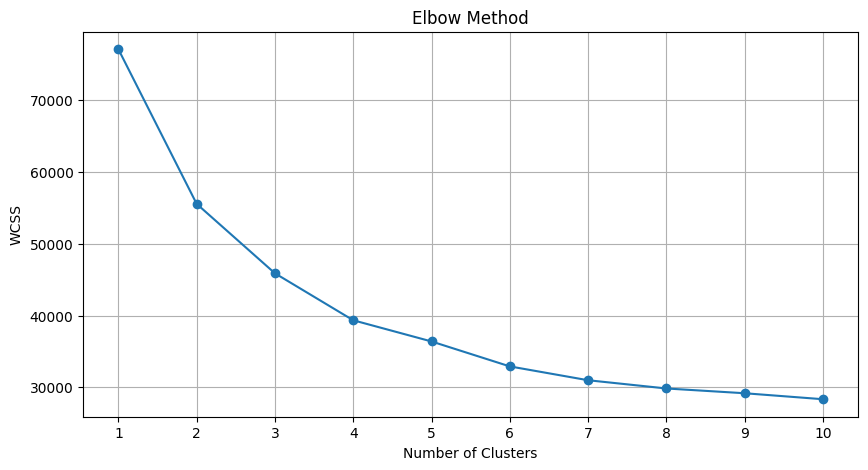

In [144]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv("c:/clu/서울교통공사_지하철혼잡도정보_20230331.csv", encoding='cp949')

# 필요한 열 선택 (호선과 시간대별 혼잡도)
selected_columns = ['호선', '5시30분', '6시00분', '6시30분', '7시00분', '7시30분', '8시00분', '8시30분',
                    '9시00분', '9시30분', '10시00분', '10시30분', '11시00분', '11시30분', '12시00분',
                    '12시30분', '13시00분', '13시30분', '14시00분', '14시30분', '15시00분', '15시30분',
                    '16시00분', '16시30분', '17시00분', '17시30분', '18시00분', '18시30분', '19시00분',
                    '19시30분', '20시00분', '20시30분', '21시00분', '21시30분', '22시00분', '22시30분',
                    '23시00분', '23시30분', '00시00분', '00시30분']

# 필요한 열만 선택
data_selected = data[selected_columns]

# 호선 열을 원-핫 인코딩으로 변환
data_selected = pd.get_dummies(data_selected, columns=['호선'])

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
data_selected_scaled = scaler.fit_transform(data_selected)

# Elbow 방법을 사용하여 적절한 클러스터의 개수 결정
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_selected_scaled)
    wcss.append(kmeans.inertia_)

# Elbow 방법 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Elbow Method를 사용하여 적절한 클러스터의 개수를 결정하는 그래프입니다. x축은 클러스터 개수를 나타내고, y축은 Within-Cluster-Sum-of-Squares(WCSS)를 나타냅니다. WCSS는 각 데이터 포인트와 해당 클러스터 중심점 사이의 거리를 제곱하여 합한 값으로 클러스터의 응집도를 나타내며, 여기서는 클러스터 개수가 4인 지점이 팔꿈치처럼 꺾이는 것을 확인할 수 있으므로, 이를 적절한 클러스터의 개수로 선택할 수 있습니다.

Cluster Counts:
Cluster
1    617
2    313
3    300
0    242
4    169
Name: count, dtype: int64
Cluster Means:
             5시30분      6시00분      6시30분      7시00분      7시30분      8시00분  \
Cluster                                                                     
0        38.403306  33.359091  36.957438  54.121488  71.165702  86.148347   
1        11.603241  12.020746  10.696759  13.594814  17.766126  23.561912   
2         6.030671   6.050160   6.121725   7.662939   9.971246  12.623323   
3        14.312333  15.422667  11.777667  12.890333  15.957667  23.900333   
4        17.277515  20.885799  20.408284  29.095266  40.191716  49.570414   

             8시30분      9시00분      9시30분     10시00분  ...     00시00분    00시30분  \
Cluster                                              ...                        
0        75.655785  70.388843  58.735124  50.572314  ...   4.383471  2.433058   
1        24.294652  26.215073  27.304862  27.127066  ...   2.648298  0.809562   
2        12.274760  11.737

C:\Users\junsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\junsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\junsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\junsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site

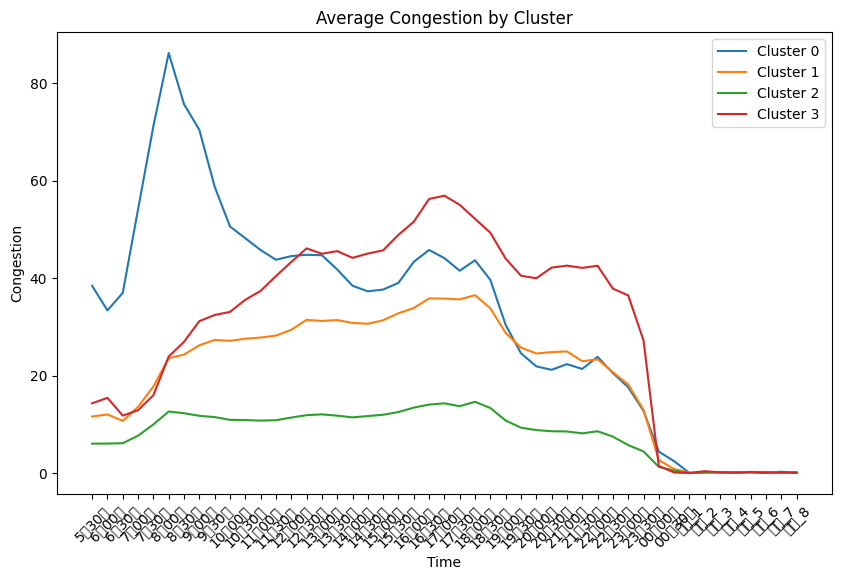

In [162]:
# K-Means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_selected_scaled)

# 클러스터 할당 결과 확인
cluster_labels = kmeans.labels_
data_selected['Cluster'] = cluster_labels

# 각 클러스터별 데이터 수 확인
cluster_counts = data_selected['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# 클러스터별 혼잡도 평균 확인
cluster_means = data_selected.groupby('Cluster').mean()
print("Cluster Means:")
print(cluster_means)

# 클러스터별 혼잡도 평균 시각화
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(cluster_means.columns, cluster_means.iloc[i], label=f'Cluster {i}')
plt.title('Average Congestion by Cluster')
plt.xlabel('Time')
plt.ylabel('Congestion')
plt.xticks(rotation=45)
plt.legend()
plt.show()


각 클러스터의 평균 혼잡도를 살펴보면, 시간대별로 지하철 혼잡도 패턴이 다르다는 것을 확인할 수 있습니다.
클러스터 0은 아침 시간대(7시 ~ 9시)에 혼잡도가 높고, 저녁 시간대(18시 ~ 20시)에도 높은 혼잡도를 보입니다. 이는 출퇴근 시간에 혼잡한 지하철을 이용하는 사람들의 특징을 나타낼 수 있습니다.
반면에 클러스터 2는 혼잡도가 상대적으로 낮은 시간대가 많습니다. 이는 비교적 혼잡하지 않은 시간대에 지하철을 이용하는 사람들의 특징을 나타낼 수 있습니다.

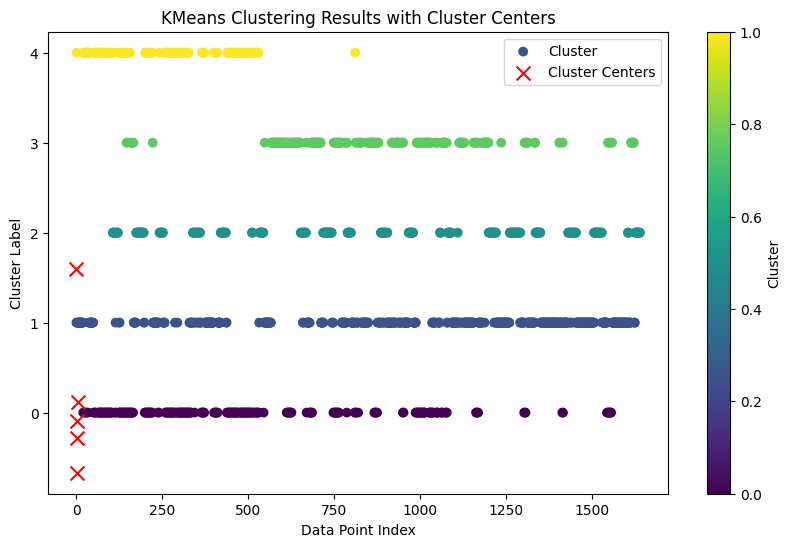

In [185]:
# KMeans 모델 피팅
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_selected_scaled)

# 클러스터 중심점 확인
cluster_centers = kmeans.cluster_centers_

# 클러스터 할당 결과 확인
cluster_labels = kmeans.labels_

# 결과 시각화
plt.figure(figsize=(10, 6))

# 클러스터 할당 결과 산점도로 표시
plt.scatter(data_selected.index, cluster_labels, c=cluster_labels, cmap='viridis', label='Cluster')

# 클러스터 중심점 산점도로 표시
plt.scatter(range(len(cluster_centers)), cluster_centers[:, 0], marker='x', s=100, c='red', label='Cluster Centers')

plt.xlabel('Data Point Index')
plt.ylabel('Cluster Label')
plt.title('KMeans Clustering Results with Cluster Centers')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


중심점이 x축과 y축의 아래 밀집되어 있는 것은 클러스터가 형성된 중심점이 해당 차원의 값이 작은 쪽에 몰려있음을 의미합니다. 이는 클러스터가 형성된 공간에서 해당 차원의 값이 작은 위치에 데이터가 밀집되어 있다는 것을 나타냅니다.

x축과 y축이 시간대와 혼잡도를 나타내는 경우, 중심점이 x축 0에 밀집되어 있다는 것은 클러스터가 시간대가 비교적 빠른 시간대에 형성되었음을 의미하고, y축 0에 밀집되어 있다는 것은 클러스터가 혼잡도가 낮은 상태에서 형성되었음을 나타냅니다.

이는 해당 시간대에는 일반적으로 지하철이 비교적 여유롭게 운행되고 있는 상태임을 나타내고 따라서 중심점을 기준으로 해당 시간대에는 승객들이 대기 없이 승차할 수 있는 공간이 충분히 제공될 것으로 예상됩니다.

In [187]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
silhouette_avg = silhouette_score(data_selected_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.19659436190478147


실루엣 점수는 대략 0.1수준으로 높지 않은 수준을 나타내고 있습니다. 시간대별 지하철의 혼잡도로 지하철 운행,승객의 의사결정에 도움을 주려면 개선이 필요하다고 생각됩니다.서로 다른 클러스터에 할당된 데이터의 혼잡도 특성을 비교하여 각 시간대에 어느 정도 혼잡한지를 이해할 수 있고 이러한 정보를 좀 더 구체화하여 승객 스스로 대중교통 이용에 대한 의사 결정에 도움이 될 수 있어서 혼잡한 시간대의 지하철 운행 증가 및 운영법등의 개선에 도움이 될 것이라고 생각합니다.